In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 15.0 MB/s 
     |████████████████████████████████| 448 kB 83.8 MB/s 


In [15]:
import re
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
train_file = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
test_file = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

train_data = pd.read_table(train_file)
test_data = pd.read_table(test_file)

In [17]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [18]:
# 중복 및 결측치

print(train_data['document'].nunique())
print(train_data['label'].nunique())

train_data.drop_duplicates(subset=['document'], inplace=True)

146182
2


In [19]:
print(train_data.isnull().sum())
train_data = train_data.dropna(how='any')

id          0
document    1
label       0
dtype: int64


In [20]:
# 데이터 정제

train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]","")
train_data[:1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0


In [21]:
train_data['document'].replace('',np.nan,inplace=True)
print(len(train_data))
print(train_data.isnull().sum())

146182
id            0
document    391
label         0
dtype: int64


In [22]:
train_data = train_data.dropna(how='any')
print(len(train_data))

145791


In [23]:
# 중복, 클리닝, 결측치 
# document 열에서 중복인 내용이 있다면 중복 제거
test_data.drop_duplicates(subset = ['document'], inplace=True) 
# 정규 표현식 수행
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") 
# 공백은 Null 값으로 변경
test_data['document'].replace('', np.nan, inplace=True) 
# Null 값 제거
test_data = test_data.dropna(how='any')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [24]:
# 토큰화 및 불용어 제거
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

okt = Okt()
X_train = []
for sentence in train_data['document']:
  X_train.append([word for word in okt.morphs(sentence) if not word in stopwords])

In [25]:
print(X_train[3])

['교도소', '이야기', '구먼', '솔직히', '재미', '없다', '평점', '조정']


In [26]:
X_test = []
for sentence in test_data['document']:
  X_test.append([word for word in okt.morphs(sentence) if not word in stopwords])

In [27]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train) 
print(tokenizer.word_index)

{'영화': 1, '을': 2, '너무': 3, '다': 4, '정말': 5, '적': 6, '만': 7, '진짜': 8, '로': 9, '점': 10, '에서': 11, '연기': 12, '것': 13, '평점': 14, '내': 15, '최고': 16, '그': 17, '나': 18, '안': 19, '인': 20, '이런': 21, '스토리': 22, '생각': 23, '못': 24, '왜': 25, '드라마': 26, '게': 27, '이다': 28, '감동': 29, '사람': 30, '보고': 31, '하는': 32, '하고': 33, '말': 34, '고': 35, '더': 36, '배우': 37, '때': 38, 'ㅋㅋ': 39, '아': 40, '감독': 41, '거': 42, '그냥': 43, '본': 44, '요': 45, '재미': 46, '시간': 47, '내용': 48, '까지': 49, '뭐': 50, '중': 51, '보다': 52, '없는': 53, '쓰레기': 54, '수': 55, '네': 56, '지': 57, '봤는데': 58, '작품': 59, '사랑': 60, '할': 61, '하나': 62, '다시': 63, '없다': 64, '볼': 65, '마지막': 66, '좋은': 67, '이건': 68, '정도': 69, '저': 70, '같은': 71, '완전': 72, '입니다': 73, '있는': 74, 'ㅋ': 75, 'ㅠㅠ': 76, '처음': 77, 'ㅋㅋㅋ': 78, '장면': 79, '액션': 80, '주인공': 81, '걸': 82, '이렇게': 83, '보는': 84, '개': 85, '하': 86, '최악': 87, '돈': 88, '이야기': 89, '지금': 90, '봐도': 91, '느낌': 92, '참': 93, '임': 94, '연출': 95, 'ㅡㅡ': 96, '라': 97, '인데': 98, '없고': 99, '듯': 100, '끝': 101, '명작': 102, '그리고': 103, '년':

In [28]:
tokenizer.word_index['잇몸']

73239

In [30]:
# 빈도 수가 낮은 단어 제거
threshold = 3 
words_cnt = len(tokenizer.word_index)
rare_cnt = 0 
words_freq = 0  
rare_freq = 0  

for key, value in tokenizer.word_counts.items():
  words_freq = words_freq + value
  if value < threshold:
    rare_cnt += 1
    rare_freq = rare_freq + value

print("전체 단어 수:", words_cnt)
print(f'빈도가 {threshold-1} 이하인 희귀 단어 수: {rare_cnt}')
print(f'희귀 단어 비율: {(rare_cnt/words_cnt)*100}')
print(f'희귀 단어 등장 빈도 비율: {(rare_freq/words_freq)*100}')


전체 단어 수: 100004
빈도가 2 이하인 희귀 단어 수: 67691
희귀 단어 비율: 67.68829246830127
희귀 단어 등장 빈도 비율: 4.949305773454659


In [31]:
vocab_size = words_cnt - rare_cnt + 2

In [33]:
tokenizer = Tokenizer(vocab_size,oov_token='OOV')
tokenizer.fit_on_texts(X_train) 
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [34]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [35]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

145383
145383


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [37]:
# 패딩
print('리뷰 최대 길이:', max(len(I) for I in X_train))
print('리뷰 평균 길이:', sum(map(len,X_train))/len(X_train))

리뷰 최대 길이: 72
리뷰 평균 길이: 11.22376068728806


Text(0, 0.5, 'Number of Samples')

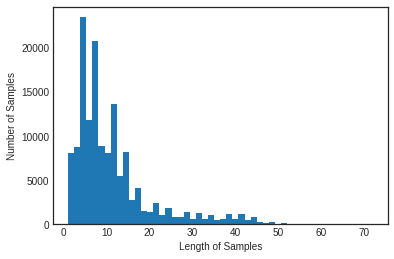

In [38]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')

In [39]:
max_len = 60
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [43]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
               loss = 'binary_crossentropy',
               metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 100)         3231500   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,348,877
Trainable params: 3,348,877
Non-trainable params: 0
_________________________________________________________________


In [44]:
history = model.fit(X_train,y_train,epochs=15, batch_size=60,validation_split=0.2)

Epoch 1/15
1939/1939 [==============================] - 27s 10ms/step - loss: 0.3993 - acc: 0.8170 - val_loss: 0.3554 - val_acc: 0.8419
Epoch 2/15
1939/1939 [==============================] - 18s 9ms/step - loss: 0.3233 - acc: 0.8597 - val_loss: 0.3304 - val_acc: 0.8558
Epoch 3/15
1939/1939 [==============================] - 17s 9ms/step - loss: 0.2913 - acc: 0.8775 - val_loss: 0.3223 - val_acc: 0.8599
Epoch 4/15
1939/1939 [==============================] - 17s 9ms/step - loss: 0.2697 - acc: 0.8884 - val_loss: 0.3241 - val_acc: 0.8595
Epoch 5/15
1939/1939 [==============================] - 17s 9ms/step - loss: 0.2530 - acc: 0.8972 - val_loss: 0.3262 - val_acc: 0.8604
Epoch 6/15
1939/1939 [==============================] - 17s 9ms/step - loss: 0.2368 - acc: 0.9037 - val_loss: 0.3380 - val_acc: 0.8547
Epoch 7/15
1939/1939 [==============================] - 17s 9ms/step - loss: 0.2206 - acc: 0.9119 - val_loss: 0.3457 - val_acc: 0.8519
Epoch 8/15
1939/1939 [==============================] 

In [46]:
model.evaluate(X_test,y_test)

1532/1532 [==============================] - 5s 3ms/step - loss: 0.5525 - acc: 0.8278


[0.5525493621826172, 0.8277579545974731]

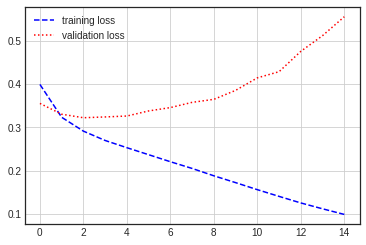

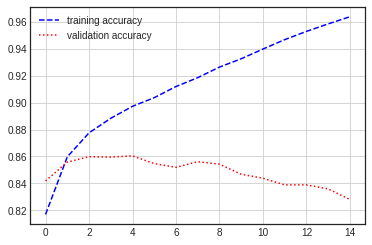

In [47]:
# 시각화
# 시각화
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss'] 
acc = hist_dict['acc'] 
val_acc = hist_dict['val_acc'] 

plt.plot(loss,'b--', label='training loss')
plt.plot(val_loss,'r:', label='validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(acc,'b--', label='training accuracy')
plt.plot(val_acc,'r:', label='validation accuracy')
plt.legend()
plt.grid()

plt.show()


[과제] 네이버 쇼핑 리뷰 데이터로 감정분석을 수행하세요.

In [14]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt',filename="shopping.txt")


('shopping.txt', <http.client.HTTPMessage at 0x7fb356ba3150>)

In [48]:
total_data = pd.read_table('shopping.txt', names=['ratings','reviews'])
total_data[:5]

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [49]:
# 훈련 데이터와 테스트 데이터 분리
total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)
total_data[:5]

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


In [ ]:
# 감정 예측
def sentiment_predict(new_sentence):
  new_token = [word for word in okt.morphs(new_sentence) if not word in stopwords]
  new_sequences = tokenizer.texts_to_sequences([new_token])
  new_pad = pad_sequences(new_sequences,maxlen=max_len)
  score = float(loaded_model.predict(new_pad))

  if score > 0.5:
    print(f"{new_sentence} -> 긍정 {score*100:.2f}%")
  else:
    print(f"{new_sentence} -> 부정 {(1-score)*100:.2f}%")



In [ ]:
sentiment_predict('처음 써봤는데 대박 좋아요.')
sentiment_predict('원래 배송이 이렇게 늦나요')
sentiment_predict('좋은 거 인정! 추가 구매 의향 있습니다.')
sentiment_predict('이건 정말 리뷰 쓰는 것이 아깝네요.')
